# Tutorial 1: Data Loading and Cleaning with Pandas

Welcome to this comprehensive tutorial on data loading and cleaning! In this notebook, we'll explore how to work with real-world data using **pandas**, Python's most popular data manipulation library.

## Why Data Cleaning Matters in Machine Learning

Before we can train any machine learning model, we need to prepare our data. In fact, data scientists often spend 60-80% of their time on data preparation! Here's why:

- **Real-world data is messy**: Missing values, inconsistent formats, outliers
- **Models need clean input**: Most ML algorithms can't handle missing values or non-numeric data
- **Quality in = Quality out**: Better data preparation leads to better model performance

## What We'll Learn

1. Loading data with pandas
2. Exploring and understanding our dataset
3. Handling missing values
4. Data type conversions
5. Creating new features (feature engineering basics)
6. Preparing data for ML models

Let's get started!

## Step 1: Importing Libraries

First, we need to import the tools we'll use:
- **pandas**: Our main data manipulation library (commonly abbreviated as `pd`)
- **seaborn**: A visualization library that also includes sample datasets

Think of importing libraries like getting tools out of a toolbox before starting a project.

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np  # Let's also import numpy for some numerical operations

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3


## Step 2: Loading Data

Now let's load our dataset. We'll use the famous **Titanic dataset**, which contains information about passengers on the Titanic.

### Why the Titanic Dataset?
- It's a classic ML dataset for binary classification (survived or not)
- It has realistic data quality issues (missing values, mixed data types)
- It's relatively small and easy to understand

### What is a DataFrame?
When we load data with pandas, it creates a **DataFrame** - think of it as a smart spreadsheet:
- **Rows**: Individual records (each passenger)
- **Columns**: Features/attributes (age, fare, cabin, etc.)
- **Index**: Row labels (by default, numbered 0, 1, 2, ...)

Let's load the data:

In [16]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display a success message
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")  # (rows, columns)
print(f"We have {df.shape[0]} passengers and {df.shape[1]} features")

Dataset loaded successfully!
Shape of the dataset: (891, 15)
We have 891 passengers and 15 features


## Step 3: Initial Data Exploration

Before cleaning data, we need to **understand** what we're working with. Let's use some essential pandas functions to explore our dataset.

### The `.head()` Method
This shows the first few rows of our DataFrame (default is 5 rows). It's like peeking at the top of a spreadsheet to see what kind of data we have.

In [17]:
# Look at the first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### The `.info()` Method

This is one of the **most important** methods for data exploration! It shows:
- **Column names**: What features we have
- **Data types**: Whether each column is numeric, text (object), etc.
- **Non-null count**: How many non-missing values in each column
- **Memory usage**: How much space the data takes

This is crucial for ML because it immediately shows us:
1. Which columns have missing values
2. Which columns need type conversion
3. The overall structure of our data

In [18]:
# Get detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### The `.describe()` Method

This provides **statistical summaries** for numerical columns:
- **count**: Number of non-missing values
- **mean**: Average value
- **std**: Standard deviation (spread of data)
- **min/max**: Smallest and largest values
- **25%, 50%, 75%**: Quartiles (percentiles)

This helps us spot:
- Outliers (extreme values)
- Scale differences between features
- Distribution characteristics

For ML, knowing these statistics helps us decide if we need to normalize or scale features!

In [19]:
# Get statistical summary of numerical columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Understanding the Columns

Let's look at what each column means:
- **survived**: Our target variable (0 = died, 1 = survived) - what we want to predict!
- **pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) - socioeconomic status
- **sex**: Gender of passenger
- **age**: Age in years
- **sibsp**: Number of siblings/spouses aboard
- **parch**: Number of parents/children aboard
- **fare**: Ticket price
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **class**: Text version of pclass
- **deck**: Deck level (extracted from cabin)
- **alive**: Text version of survived

### Accessing Individual Columns

In pandas, we can access a single column using bracket notation:

In [20]:
# Access a single column - this returns a Series (1-dimensional)
print("Ages of first 10 passengers:")
print(df['age'].head(10))

# We can also use .value_counts() to see the distribution of categorical values
print("\n\nSurvival distribution:")
print(df['survived'].value_counts())

Ages of first 10 passengers:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


Survival distribution:
survived
0    549
1    342
Name: count, dtype: int64


## Step 4: Handling Missing Values

Missing values are **the most common data quality issue** in real-world datasets. Most ML algorithms cannot handle missing values, so we must deal with them!

### Detecting Missing Values

Pandas uses `NaN` (Not a Number) to represent missing values. Let's use `.isnull()` and `.sum()` to count missing values:

In [21]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Calculate percentage of missing values
print("\n\nPercentage of missing values:")
missing_percentage = (missing_values[missing_values > 0] / len(df)) * 100
print(missing_percentage)

Missing values per column:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


Percentage of missing values:
age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64


### Strategies for Handling Missing Values

We have several options when dealing with missing values:

1. **Drop rows/columns**: If very few values are missing or the column isn't important
2. **Fill with a constant**: Use a placeholder value (e.g., 0, "Unknown")
3. **Fill with statistics**: Use mean, median, or mode
4. **Forward/backward fill**: Use previous/next value (for time series)
5. **Predictive imputation**: Use ML to predict missing values (advanced)

### Strategy for Our Dataset

- **age**: ~20% missing - we'll fill with the **median** (robust to outliers)
- **embarked**: Only 2 missing - we'll fill with the **mode** (most common value)
- **deck**: ~77% missing - we'll **drop** this column (too much missing data)
- **embark_town**: Similar to embarked, we'll drop it to avoid redundancy

Let's implement these strategies:

In [22]:
# Create a copy of the dataframe to preserve the original
df_clean = df.copy()

# 1. Fill missing age values with median
# Why median? It's less affected by outliers than mean
median_age = df_clean['age'].median()
df_clean['age'].fillna(median_age, inplace=True)
print(f"Filled {df['age'].isnull().sum()} missing age values with median: {median_age}")

# 2. Fill missing embarked values with mode (most common value)
mode_embarked = df_clean['embarked'].mode()[0]  # mode() returns a Series, we take first value
df_clean['embarked'].fillna(mode_embarked, inplace=True)
print(f"Filled {df['embarked'].isnull().sum()} missing embarked values with mode: {mode_embarked}")

# 3. Drop columns with too many missing values
columns_to_drop = ['deck', 'embark_town']
df_clean.drop(columns=columns_to_drop, inplace=True)
print(f"\nDropped columns: {columns_to_drop}")

# Verify we've handled all missing values
print("\n\nRemaining missing values:")
print(df_clean.isnull().sum().sum())  # Double .sum() gives total missing values

Filled 177 missing age values with median: 28.0
Filled 2 missing embarked values with mode: S

Dropped columns: ['deck', 'embark_town']


Remaining missing values:
0

Dropped columns: ['deck', 'embark_town']


Remaining missing values:
0


C:\Users\nehera\AppData\Local\Temp\ipykernel_52884\2968007590.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['age'].fillna(median_age, inplace=True)
C:\Users\nehera\AppData\Local\Temp\ipykernel_52884\2968007590.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

## Step 5: Data Type Conversions

Different data types are handled differently by ML algorithms. Let's look at what we have:

### Types of Data in ML:
1. **Numerical (Continuous)**: Age, fare - can be any value in a range
2. **Numerical (Discrete)**: Survived, pclass - specific integer values
3. **Categorical**: Sex, embarked - limited set of categories
4. **Text**: Name - free-form text (often need special handling)

Let's check our current data types:

In [23]:
# Check data types
print("Data types in our cleaned dataset:")
print(df_clean.dtypes)

# Let's also see unique values for categorical columns
print("\n\nUnique values in 'sex':", df_clean['sex'].unique())
print("Unique values in 'embarked':", df_clean['embarked'].unique())

Data types in our cleaned dataset:
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class         category
who             object
adult_male        bool
alive           object
alone             bool
dtype: object


Unique values in 'sex': ['male' 'female']
Unique values in 'embarked': ['S' 'C' 'Q']


### Converting Categorical Variables to Numbers

Most ML algorithms require **numerical input**. We need to convert categorical variables like 'sex' and 'embarked' to numbers.

Two main approaches:
1. **Label Encoding**: Convert categories to numbers (0, 1, 2, ...) - good for ordinal data
2. **One-Hot Encoding**: Create binary columns for each category - good for nominal data

For 'sex' (only 2 categories), we can use simple mapping.
For 'embarked' (3 categories with no order), we'll use one-hot encoding with `pd.get_dummies()`.

In [24]:
# 1. Encode 'sex' as binary (male=1, female=0)
df_clean['sex_encoded'] = df_clean['sex'].map({'male': 1, 'female': 0})

# 2. One-hot encode 'embarked' (creates separate columns for each value)
# drop_first=True prevents multicollinearity (avoids redundant information)
embarked_dummies = pd.get_dummies(df_clean['embarked'], prefix='embarked', drop_first=True)

# Add the new columns to our dataframe
df_clean = pd.concat([df_clean, embarked_dummies], axis=1)

print("New columns created:")
print(df_clean[['sex', 'sex_encoded', 'embarked', 'embarked_Q', 'embarked_S']].head())

print("\n\nEncoding explanation:")
print("- sex_encoded: 1 if male, 0 if female")
print("- embarked_Q: 1 if embarked at Queenstown, 0 otherwise")
print("- embarked_S: 1 if embarked at Southampton, 0 otherwise")
print("- If both Q and S are 0, passenger embarked at Cherbourg (C)")

New columns created:
      sex  sex_encoded embarked  embarked_Q  embarked_S
0    male            1        S       False        True
1  female            0        C       False       False
2  female            0        S       False        True
3  female            0        S       False        True
4    male            1        S       False        True


Encoding explanation:
- sex_encoded: 1 if male, 0 if female
- embarked_Q: 1 if embarked at Queenstown, 0 otherwise
- embarked_S: 1 if embarked at Southampton, 0 otherwise
- If both Q and S are 0, passenger embarked at Cherbourg (C)


## Step 6: Feature Engineering

**Feature engineering** is creating new features from existing ones. Good features can dramatically improve ML model performance!

### Creating a Family Size Feature

Let's combine `sibsp` (siblings/spouses) and `parch` (parents/children) to create a `family_size` feature. Hypothesis: Larger families might have different survival rates.

### Creating an Age Group Feature

Instead of exact age, let's categorize passengers into age groups. This can help the model learn patterns more easily.

In [25]:
# 1. Create family_size feature
# Add 1 to include the passenger themselves
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1

# 2. Create is_alone feature (binary: traveling alone or not)
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

# 3. Create age groups using pd.cut()
# This bins continuous values into discrete categories
df_clean['age_group'] = pd.cut(df_clean['age'], 
                                bins=[0, 12, 18, 35, 60, 100], 
                                labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

# Display some examples
print("New features created:")
print(df_clean[['sibsp', 'parch', 'family_size', 'is_alone', 'age', 'age_group']].head(10))

# Check distribution of new features
print("\n\nAge group distribution:")
print(df_clean['age_group'].value_counts().sort_index())

New features created:
   sibsp  parch  family_size  is_alone   age   age_group
0      1      0            2         0  22.0       Adult
1      1      0            2         0  38.0  Middle Age
2      0      0            1         1  26.0       Adult
3      1      0            2         0  35.0       Adult
4      0      0            1         1  35.0       Adult
5      0      0            1         1  28.0       Adult
6      0      0            1         1  54.0  Middle Age
7      3      1            5         0   2.0       Child
8      0      2            3         0  27.0       Adult
9      1      0            2         0  14.0        Teen


Age group distribution:
age_group
Child          69
Teen           70
Adult         535
Middle Age    195
Senior         22
Name: count, dtype: int64


## Step 7: Selecting Features for ML

Now we need to decide which columns to keep for our ML model. We want:
- **Relevant features**: Columns that help predict survival
- **Numerical features**: Already encoded or numeric
- **No redundancy**: Avoid duplicate information

Let's select the most useful columns and drop:
- Text columns that haven't been encoded (name, sex, embarked, alive, class)
- Our target variable will be kept separate

In [26]:
# Select features for ML model
feature_columns = ['pclass', 'sex_encoded', 'age', 'sibsp', 'parch', 
                   'fare', 'embarked_Q', 'embarked_S', 'family_size', 'is_alone']

# Create feature matrix (X) and target vector (y)
X = df_clean[feature_columns]
y = df_clean['survived']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\n\nFeatures we'll use for ML:")
print(X.columns.tolist())

# Display first few rows of our ML-ready data
print("\n\nFirst 5 rows of feature matrix:")
print(X.head())

Feature matrix shape: (891, 10)
Target vector shape: (891,)


Features we'll use for ML:
['pclass', 'sex_encoded', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S', 'family_size', 'is_alone']


First 5 rows of feature matrix:
   pclass  sex_encoded   age  sibsp  parch     fare  embarked_Q  embarked_S  \
0       3            1  22.0      1      0   7.2500       False        True   
1       1            0  38.0      1      0  71.2833       False       False   
2       3            0  26.0      0      0   7.9250       False        True   
3       1            0  35.0      1      0  53.1000       False        True   
4       3            1  35.0      0      0   8.0500       False        True   

   family_size  is_alone  
0            2         0  
1            2         0  
2            1         1  
3            2         0  
4            1         1  


## Step 8: Final Data Quality Check

Before using our data for ML, let's verify everything is clean and ready:

### Checklist:
✓ No missing values
✓ All features are numerical
✓ No infinite or extreme outliers (optional, depends on algorithm)
✓ Data types are appropriate

In [27]:
# Check for missing values
print("Missing values in feature matrix:", X.isnull().sum().sum())
print("Missing values in target vector:", y.isnull().sum())

# Check data types
print("\n\nData types:")
print(X.dtypes)

# Check for any infinite values
print("\n\nInfinite values:", np.isinf(X).sum().sum())

# Summary statistics
print("\n\nFinal summary statistics:")
print(X.describe())

print("\n\n✅ Data is clean and ready for machine learning!")

Missing values in feature matrix: 0
Missing values in target vector: 0


Data types:
pclass           int64
sex_encoded      int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked_Q        bool
embarked_S        bool
family_size      int64
is_alone         int64
dtype: object


Infinite values: 0


Final summary statistics:
           pclass  sex_encoded         age       sibsp       parch  \
count  891.000000   891.000000  891.000000  891.000000  891.000000   
mean     2.308642     0.647587   29.361582    0.523008    0.381594   
std      0.836071     0.477990   13.019697    1.102743    0.806057   
min      1.000000     0.000000    0.420000    0.000000    0.000000   
25%      2.000000     0.000000   22.000000    0.000000    0.000000   
50%      3.000000     1.000000   28.000000    0.000000    0.000000   
75%      3.000000     1.000000   35.000000    1.000000    0.000000   
max      3.000000     1.000000   80.000000    8.000000    6.00

## Bonus: Quick Data Visualization

While not strictly part of data cleaning, visualization helps us understand our data better. Let's create a few simple visualizations using pandas built-in plotting (powered by matplotlib).

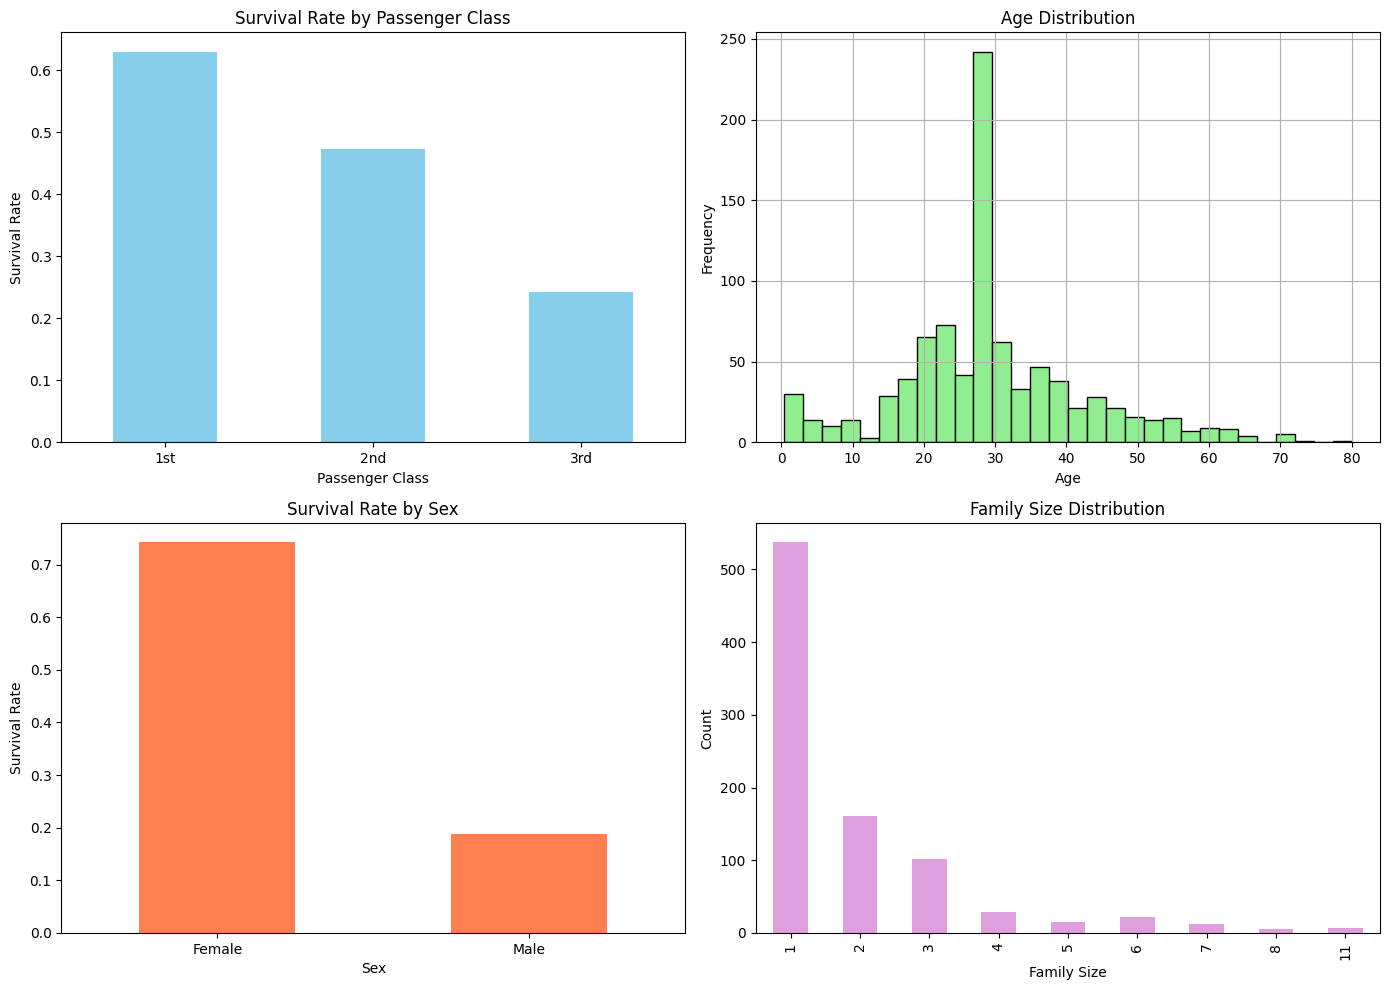

Key insights from visualizations:
- First class passengers had higher survival rates
- Women had significantly higher survival rates ("women and children first")
- Most passengers traveled alone or with small families


In [28]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Survival rate by passenger class
df_clean.groupby('pclass')['survived'].mean().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Survival Rate by Passenger Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# 2. Age distribution
df_clean['age'].hist(bins=30, ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 3. Survival rate by sex
df_clean.groupby('sex')['survived'].mean().plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Survival Rate by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_xticklabels(['Female', 'Male'], rotation=0)

# 4. Family size distribution
df_clean['family_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Family Size Distribution')
axes[1, 1].set_xlabel('Family Size')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("Key insights from visualizations:")
print("- First class passengers had higher survival rates")
print("- Women had significantly higher survival rates (\"women and children first\")")
print("- Most passengers traveled alone or with small families")

## Summary: What We've Learned

Congratulations! You've completed a full data cleaning pipeline. Let's recap the key pandas concepts and techniques:

### Essential Pandas Functions We Used:

1. **Data Loading & Exploration**
   - `pd.read_csv()` / `sns.load_dataset()` - Load data
   - `.head()`, `.tail()` - View first/last rows
   - `.info()` - Get column info and data types
   - `.describe()` - Statistical summaries
   - `.shape` - Dimensions of data

2. **Data Cleaning**
   - `.isnull()`, `.sum()` - Detect missing values
   - `.fillna()` - Fill missing values
   - `.drop()` - Remove columns or rows
   - `.copy()` - Create a copy of DataFrame

3. **Data Transformation**
   - `.map()` - Apply mapping to values
   - `pd.get_dummies()` - One-hot encoding
   - `pd.concat()` - Combine DataFrames
   - `pd.cut()` - Bin continuous values
   - `.astype()` - Convert data types

4. **Data Analysis**
   - `.value_counts()` - Count unique values
   - `.groupby()` - Group and aggregate data
   - `.unique()` - Get unique values
   - Bracket notation `[]` - Select columns

### The Data Cleaning Process:

1. **Load** the data
2. **Explore** to understand structure and issues
3. **Handle** missing values (drop, fill, or impute)
4. **Convert** data types and encode categories
5. **Engineer** new features from existing ones
6. **Select** relevant features for modeling
7. **Verify** data quality before ML


## Practice Exercises:

Now it's your turn! Let's apply what we've learned to a different dataset - the famous **Iris flower dataset**. This dataset contains measurements of iris flowers (petal and sepal) from three different species.

We used `sns.load_dataset()`, but in real projects you'll often have CSV files. To load this ino a dataframe, use `pd.read_csv()`:

```python
df = pd.read_csv('filename.csv')  # Basic usage
df = pd.read_csv('path/to/file.csv')  # With path
```

The Iris dataset is in the `data` folder. Let's load it!

### Exercise 1: Load and Explore the Data

**Tasks:**
1. Load the Iris dataset from `data/Iris.csv` using `pd.read_csv()`
2. Display the first 10 rows
3. Use `.info()` to check for data types and missing values
4. Use `.describe()` to see statistical summaries
5. Check how many samples of each species we have (hint: use `.value_counts()`)

In [29]:
# TODO: 1. Load the dataset
iris_df = pd.read_csv('data/Iris.csv')  # Replace None with the correct code to load the dataset

# TODO: 2. Display first 10 rows
print("First 10 rows:")
print(iris_df.head(10))

# TODO: 3. Check dataframe info using .info()
print("\n\nDataset Info:")
iris_df.info()

# TODO: 4. Show the statistical summary
print("\n\nStatistical Summary:")
print(iris_df.describe())

# TODO: 5. Count of each species (hint: use .value_counts())
print("\n\nSpecies distribution:")
print(iris_df['Species'].value_counts())

First 10 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       

### Exercise 2: Clean and Prepare for ML

**Tasks:**
1. Drop the 'Id' column (not useful for prediction)
2. Encode the 'Species' column to numbers using `.map()`:
   - Iris-setosa → 0
   - Iris-versicolor → 1
   - Iris-virginica → 2
3. Create a new feature called `petal_area` (PetalLengthCm × PetalWidthCm)
4. Create a new feature called `sepal_area` (SepalLengthCm × SepalWidthCm)
5. Select only the numerical features for ML (exclude original Species column)

In [30]:
iris_clean = iris_df.copy()

# TODO: 1. Drop the 'Id' column
iris_clean.drop(columns=['Id'], inplace=True)
print("✓ Dropped 'Id' column\n")

# TODO: 2. Encode Species to numbers (hint: add the species_mapping dictionary to the map function)
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
iris_clean['Species_encoded'] = iris_clean['Species'].map(species_mapping)
print("✓ Encoded Species column\n")

# TODO: 3 & 4. Create new features (a sneak peek into feature engineering!)
iris_clean['petal_area'] = iris_clean['PetalLengthCm'] * iris_clean['PetalWidthCm']
iris_clean['sepal_area'] = iris_clean['SepalLengthCm'] * iris_clean['SepalWidthCm']
print("✓ Created petal_area and sepal_area features\n")

# TODO: 5. Select features for ML
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'petal_area', 'sepal_area'] # Add the feature column names here
X_iris = iris_clean[feature_cols] # Replace None with the correct code to create the feature matrix
y_iris = iris_clean['Species_encoded'] # Replace None with the correct code to create the target vector

print("Feature matrix shape:", X_iris.shape)
print("Target vector shape:", y_iris.shape)
print("\nFirst 5 rows of cleaned data:")
print(X_iris.head())
print("\nTarget values:")
print(y_iris.head())

✓ Dropped 'Id' column

✓ Encoded Species column

✓ Created petal_area and sepal_area features

Feature matrix shape: (150, 6)
Target vector shape: (150,)

First 5 rows of cleaned data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  petal_area  \
0            5.1           3.5            1.4           0.2        0.28   
1            4.9           3.0            1.4           0.2        0.28   
2            4.7           3.2            1.3           0.2        0.26   
3            4.6           3.1            1.5           0.2        0.30   
4            5.0           3.6            1.4           0.2        0.28   

   sepal_area  
0       17.85  
1       14.70  
2       15.04  
3       14.26  
4       18.00  

Target values:
0    0
1    0
2    0
3    0
4    0
Name: Species_encoded, dtype: int64


### Bonus Exercise 3: Visualize with a Scatter Plot

**Task:**
Create a scatter plot showing the relationship between petal length and petal width, with points colored by species.

This will help you see how the three species cluster differently based on their petal measurements!

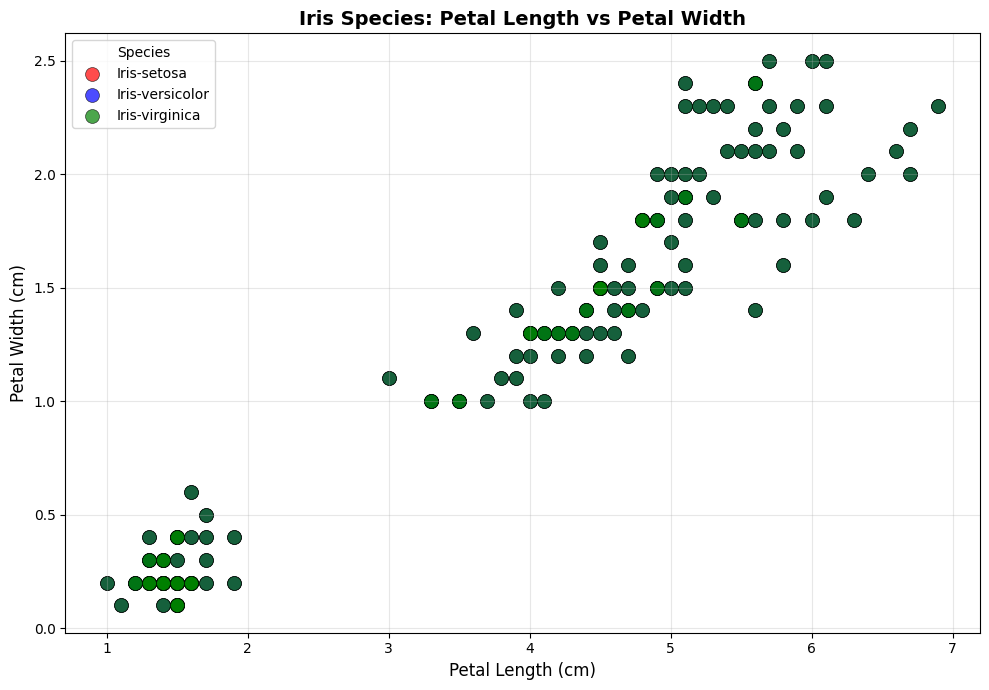

🌸 Visualization Insights:
- Iris-setosa (red) is clearly separated with smaller petals
- Iris-versicolor (blue) and Iris-virginica (green) have some overlap
- Petal measurements are excellent features for classification!


In [ ]:

plt.figure(figsize=(10, 7))

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Plot each species separately so we can color them differently
for species in iris_clean['Species'].unique():
    species_data = iris_clean[iris_clean['Species'] == species]
    
    # TODO: Replace None with the columns to create the scatter plot of the petal length vs petal width
    plt.scatter(species_data['PetalLengthCm'], 
                species_data['PetalWidthCm'],
                c=colors[species],
                label=species,
                alpha=0.7,  # Slight transparency
                s=100,      # Size of points
                edgecolors='black',
                linewidth=0.5)

plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Iris Species: Petal Length vs Petal Width', fontsize=14, fontweight='bold')
plt.legend(title='Species', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🌸 Visualization Insights:")
print("- Iris-setosa (red) is clearly separated with smaller petals")
print("- Iris-versicolor (blue) and Iris-virginica (green) have some overlap")
print("- Petal measurements are excellent features for classification!")